In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Problem statement:
#The aim is to build a predictive model to find out the sales of each product at a particular 
#store so that it would help the decision makers at BigMart to find out the properties of any product or store, 
#which play a key role in increasing the overall sales.

In [3]:
data=pd.read_csv('bigmartsales-cleaned.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [4]:
# Summary stats
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7774.0,11.676740,5.776851,0.00,7.720000,11.800000,16.500000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.00,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.998838,62.258099,31.30,93.800000,142.700000,185.650000,266.900000
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.00,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.29,834.247400,1794.331000,3101.296400,13086.964800
Profit,8523.0,13.414514,1.701840,0.10,13.150000,13.900000,14.300000,24.000000


In [6]:
# Item_weight, item_visibility has 0 values, we have to convert to mising values
# Item_visibility has standard deviation less .05 

In [7]:
data.describe(include=object).T

,count,unique,top,freq
Item_Identifier,8523,1559,FDW13,10
Item_Fat_Content,8523,2,Low Fat,5517
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Identifier,8523,10,OUT027,935
Outlet_Size,6113,3,Medium,2793
Outlet_Location_Type,6473,8,Tier 2,2793
Outlet_Type,8523,4,Supermarket Type1,5577


In [8]:
# missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [9]:
data['Item_Weight'][data['Item_Weight']==0].count()

714

In [10]:
data['Item_Weight']=data['Item_Weight'].replace(0,np.nan)

In [11]:
data['Item_Visibility']=data['Item_Visibility'].replace(0,np.nan)

In [12]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [13]:
#Missing value Imputation

In [14]:
# Normal distribution --- mean imputation
# Skewed distribution --- median imputation
# categorical data--- mode imputation

In [15]:
num=data.select_dtypes(include=np.number)
cat=data.select_dtypes(include=object)

In [16]:
# -0.5 to +0.5 ---- tolerable range 
num.skew()

Item_Weight                  0.082426
Item_Visibility              1.231434
Item_MRP                     0.127390
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Profit                      -3.379808
dtype: float64

In [17]:
#data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [18]:
data['Item_Visibility'].fillna(data['Item_Visibility'].median(),inplace=True)

<Axes: ylabel='Density'>

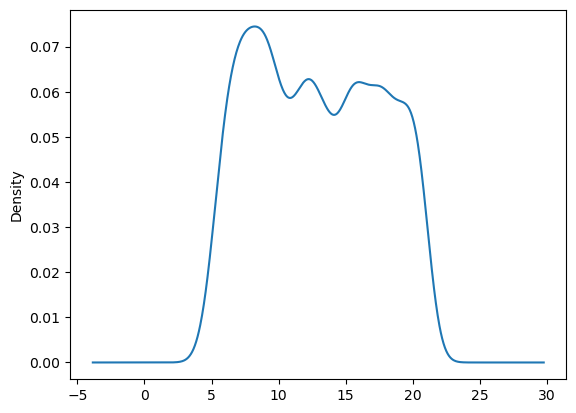

In [19]:
data['Item_Weight'].plot(kind='kde')

In [20]:
#group wise mean
data['Item_Weight'].isnull().sum()


1463

In [21]:
data['Item_Weight']=data.groupby('Item_Identifier')['Item_Weight'].transform('mean')

In [22]:
data['Item_Weight'].isnull().sum()

4

In [23]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

<Axes: ylabel='Density'>

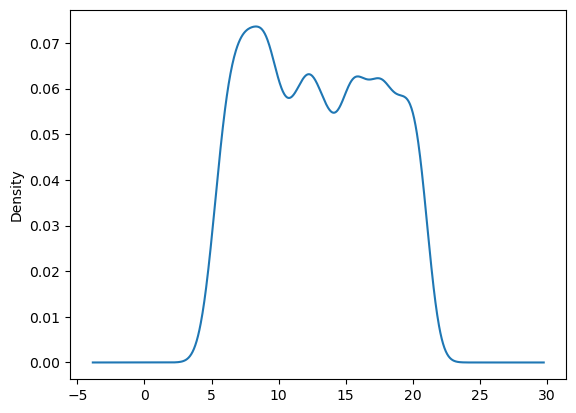

In [24]:
data['Item_Weight'].plot(kind='kde')

In [25]:
data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [26]:
data['Outlet_Location_Type'].fillna(data['Outlet_Location_Type'].mode()[0], inplace=True)

In [27]:
data['Outlet_Size'].isnull().sum()

2410

<Axes: xlabel='Outlet_Size', ylabel='count'>

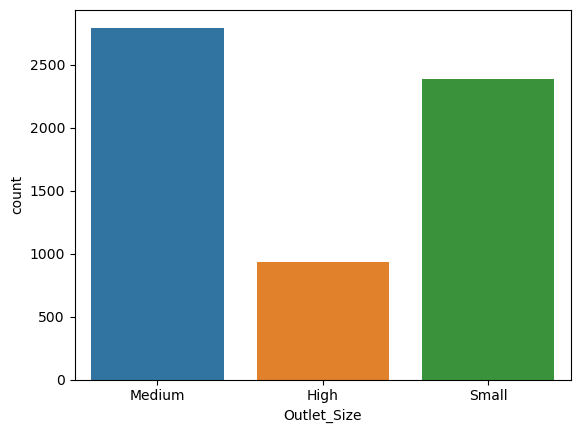

In [28]:
sns.countplot(x=data['Outlet_Size'])

In [29]:
data.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [30]:
ind=data[data['Outlet_Size'].isnull()==True].index

In [31]:
for r in ind:
    if (data.loc[r,'Item_Outlet_Sales']<=1912):
        data.loc[r,'Outlet_Size']='Small'
    elif (data.loc[r,'Item_Outlet_Sales']>1912) & (data.loc[r,'Item_Outlet_Sales']<=2500):
        data.loc[r,'Outlet_Size']='High'
    else:
        data.loc[r,'Outlet_Size']='Medium'


In [32]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Profit                       0
dtype: int64

In [33]:
for col in cat:
    print('The number ofcategories are','for',col,'is',cat[col].nunique())
    print('The categories are','for',col,'is',cat[col].value_counts())

The number ofcategories are for Item_Identifier is 1559
The categories are for Item_Identifier is Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
The number ofcategories are for Item_Fat_Content is 2
The categories are for Item_Fat_Content is Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64
The number ofcategories are for Item_Type is 16
The categories are for Item_Type is Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 11

In [34]:
data['Outlet_Location_Type'].replace({'?':np.nan,'  --':np.nan,'  -':np.nan,'na':np.nan,'NAN':np.nan},inplace=True)

In [35]:
data.isnull().sum()


Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type         360
Outlet_Type                    0
Item_Outlet_Sales              0
Profit                         0
dtype: int64

In [36]:
data['Outlet_Location_Type'].fillna(data['Outlet_Location_Type'].mode()[0], inplace=True)

#EDA 
1. Which outlet has got the highest sales?
2. What is the impact of Outlet size on Outlet sales?
3. What is the impact of Outlet type on on Outlet sales?
4. Which item type has got the high range of item MRP?
5. Does outlet location type is impacting the sales of the outlet?
6. See the relationship of outlet type and Outlet location type.
7. Which item has got the highest sales and profit?
8. which outlet type is producing sales and has items with more MRP?  

# Mar 31, 2024

In [37]:
# num - num :
# num - cat :
# cat - cat :

In [38]:
data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

Outlet_Identifier
OUT027    3694.038558
OUT035    2438.841866
OUT049    2348.354635
OUT017    2340.675263
OUT013    2298.995256
OUT046    2277.844267
OUT045    2192.384798
OUT018    1995.498739
OUT019     340.329723
OUT010     339.351662
Name: Item_Outlet_Sales, dtype: float64

In [39]:
#2. What is the impact of Outlet size on Outlet sales?
data.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

Outlet_Size
Medium    2910.085636
High      2274.778803
Small     1494.283982
Name: Item_Outlet_Sales, dtype: float64

In [40]:
#3. What is the impact of Outlet type on on Outlet sales?
data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

Outlet_Type
Supermarket Type3    3694.038558
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Grocery Store         339.828500
Name: Item_Outlet_Sales, dtype: float64

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

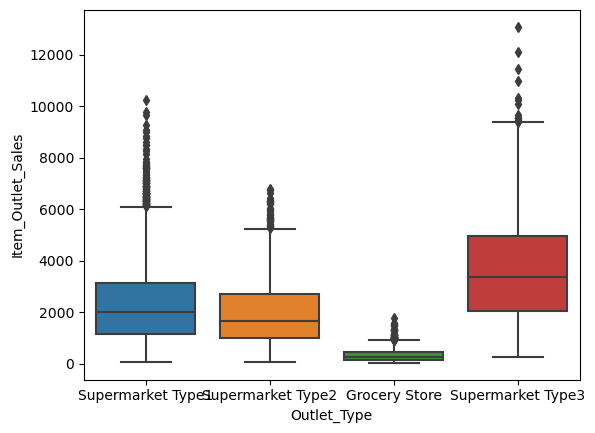

In [41]:
sns.boxplot(x=data['Outlet_Type'],y=data['Item_Outlet_Sales'])

In [42]:
#4. Which item type has got the high range of item MRP?
data.groupby('Item_Type')['Item_MRP'].mean().sort_values(ascending=False)

Item_Type
Household                149.406044
Dairy                    148.588563
Starchy Foods            147.840541
Snack Foods              146.197917
Fruits and Vegetables    144.594562
Breakfast                141.781818
Seafood                  141.343750
Breads                   140.817928
Meat                     140.100000
Canned                   139.757011
Frozen Foods             138.526986
Hard Drinks              137.079439
Others                   132.852663
Soft Drinks              131.387191
Health and Hygiene       130.805000
Baking Goods             126.379012
Name: Item_MRP, dtype: float64

<Axes: xlabel='Item_Type', ylabel='Item_MRP'>

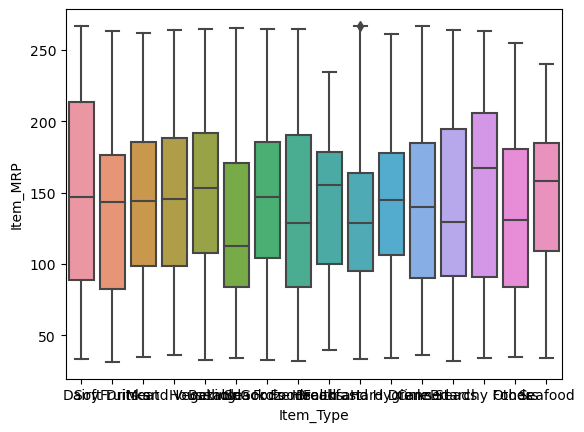

In [43]:
sns.boxplot(x=data['Item_Type'],y=data['Item_MRP'])

In [44]:
5#. Does outlet location type is impacting the sales of the outlet?
data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

Outlet_Location_Type
Tier 3    2298.995256
Tier 2    2283.730470
Tier1     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [45]:
#6. See the relationship of outlet type and Outlet location type.
tab = pd.crosstab(data['Outlet_Type'],data['Outlet_Location_Type'])
tab

Outlet_Location_Type,Tier 2,Tier 3,Tier1
Outlet_Type,,,
Grocery Store,555,0,528
Supermarket Type1,2785,932,1860
Supermarket Type2,928,0,0
Supermarket Type3,935,0,0


<Axes: xlabel='Outlet_Type'>

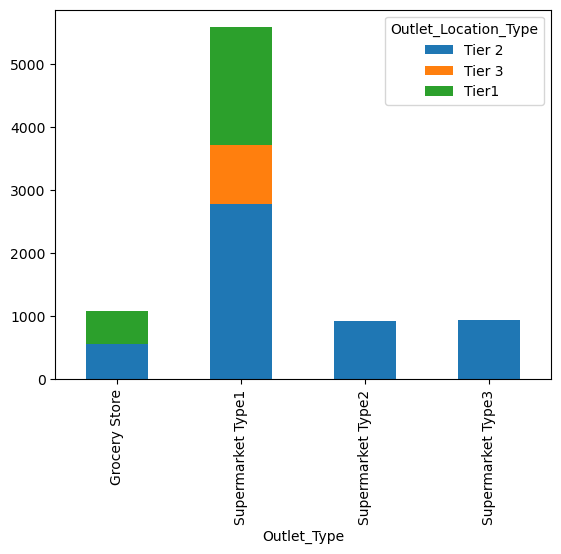

In [46]:
tab.plot(kind='bar',stacked=True)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [48]:
num=data.select_dtypes(include=np.number)
cat=data.select_dtypes(include=object)

In [49]:
num.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
Item_Weight,1.000000,-0.016468,0.026144,-0.013418,0.013165,-0.009630
Item_Visibility,-0.016468,1.000000,-0.005066,-0.078328,-0.134161,0.011803
Item_MRP,0.026144,-0.005066,1.000000,0.005046,0.567555,0.004109
Outlet_Establishment_Year,-0.013418,-0.078328,0.005046,1.000000,-0.049135,-0.019674
Item_Outlet_Sales,0.013165,-0.134161,0.567555,-0.049135,1.000000,0.000951
Profit,-0.009630,0.011803,0.004109,-0.019674,0.000951,1.000000


<Axes: >

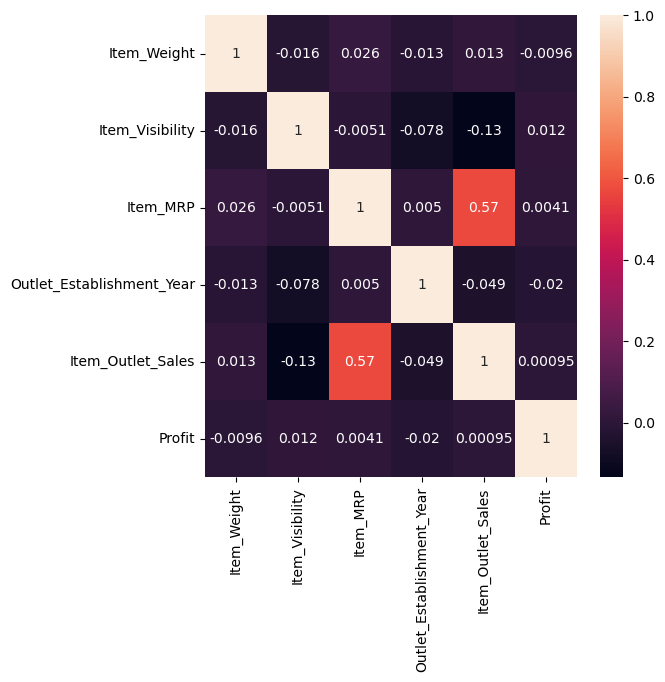

In [50]:
# num - num
plt.figure(figsize=[6,6])
sns.heatmap(num.corr(),annot=True)

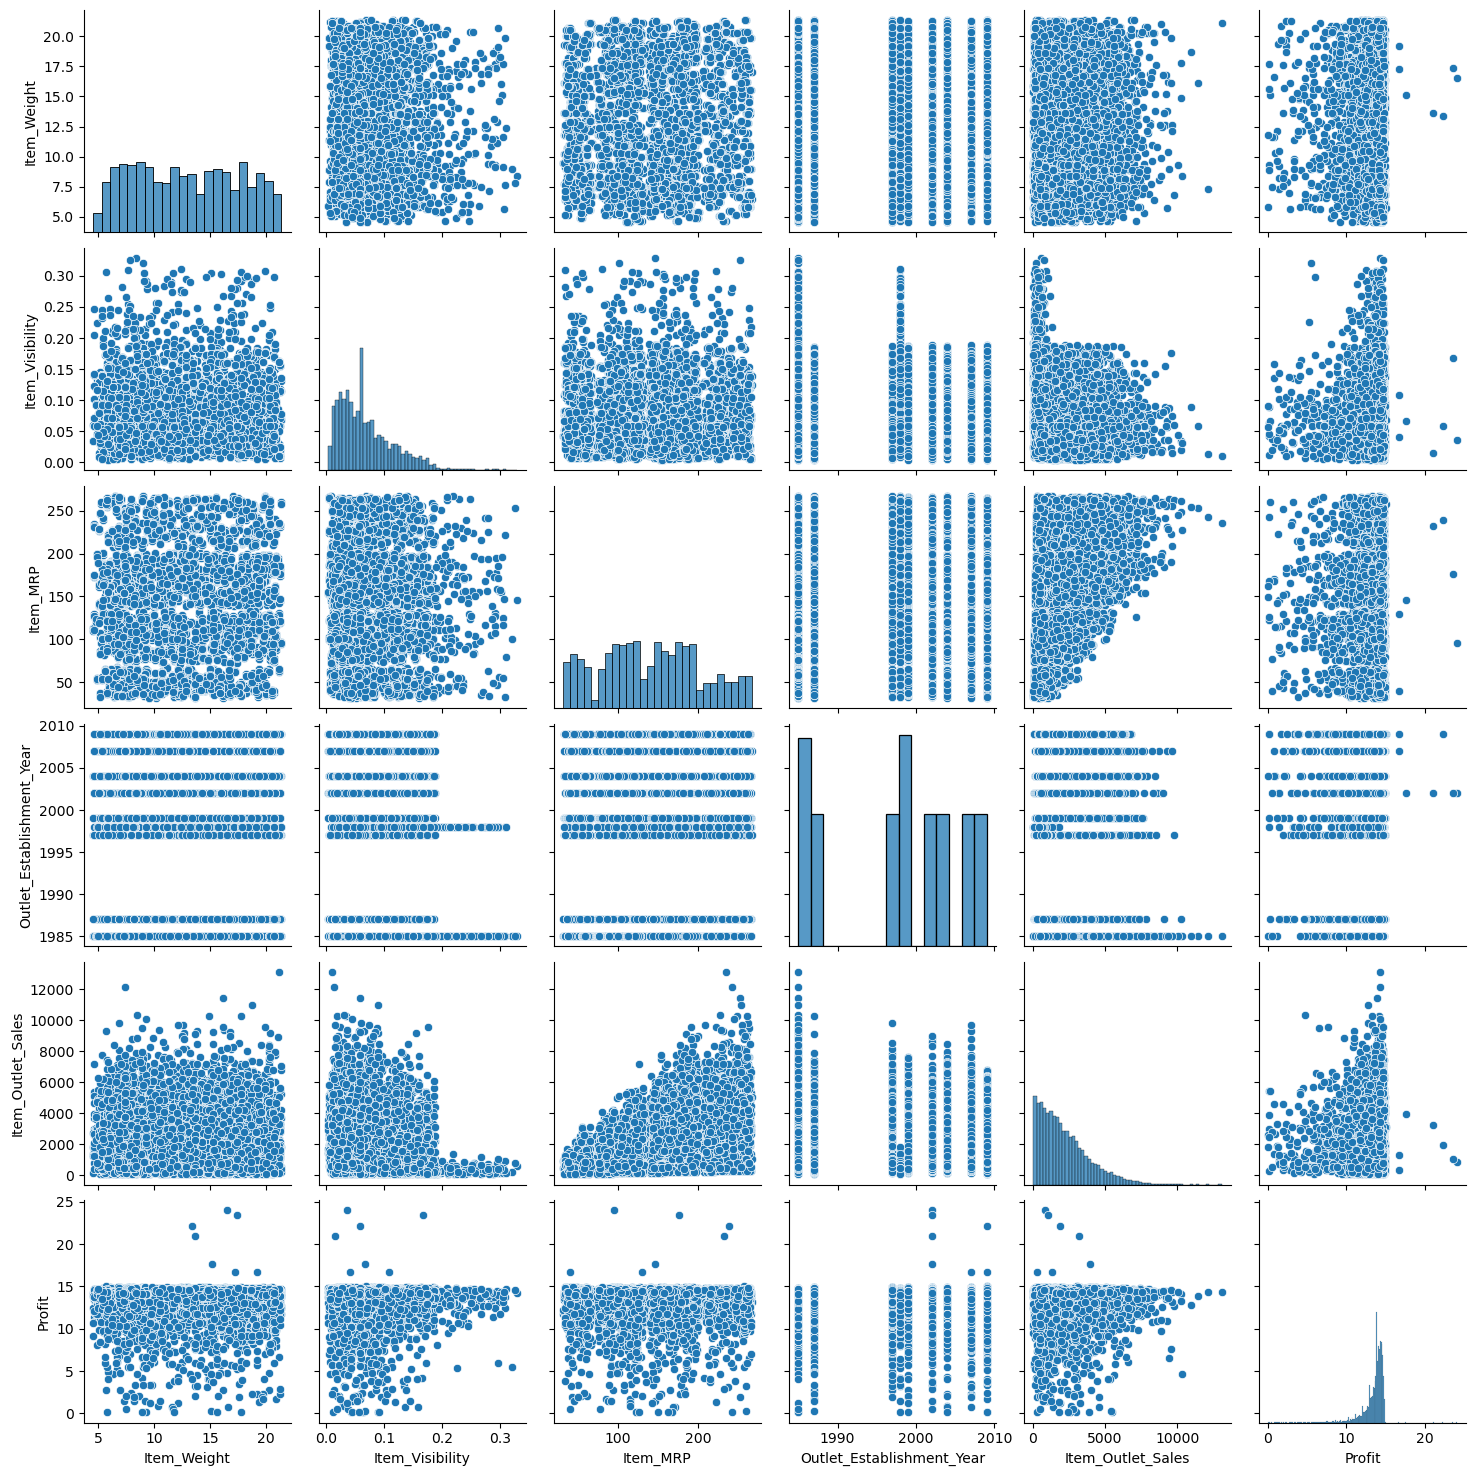

In [51]:
# pair plot can be used for num-num analysis
sns.pairplot(num)

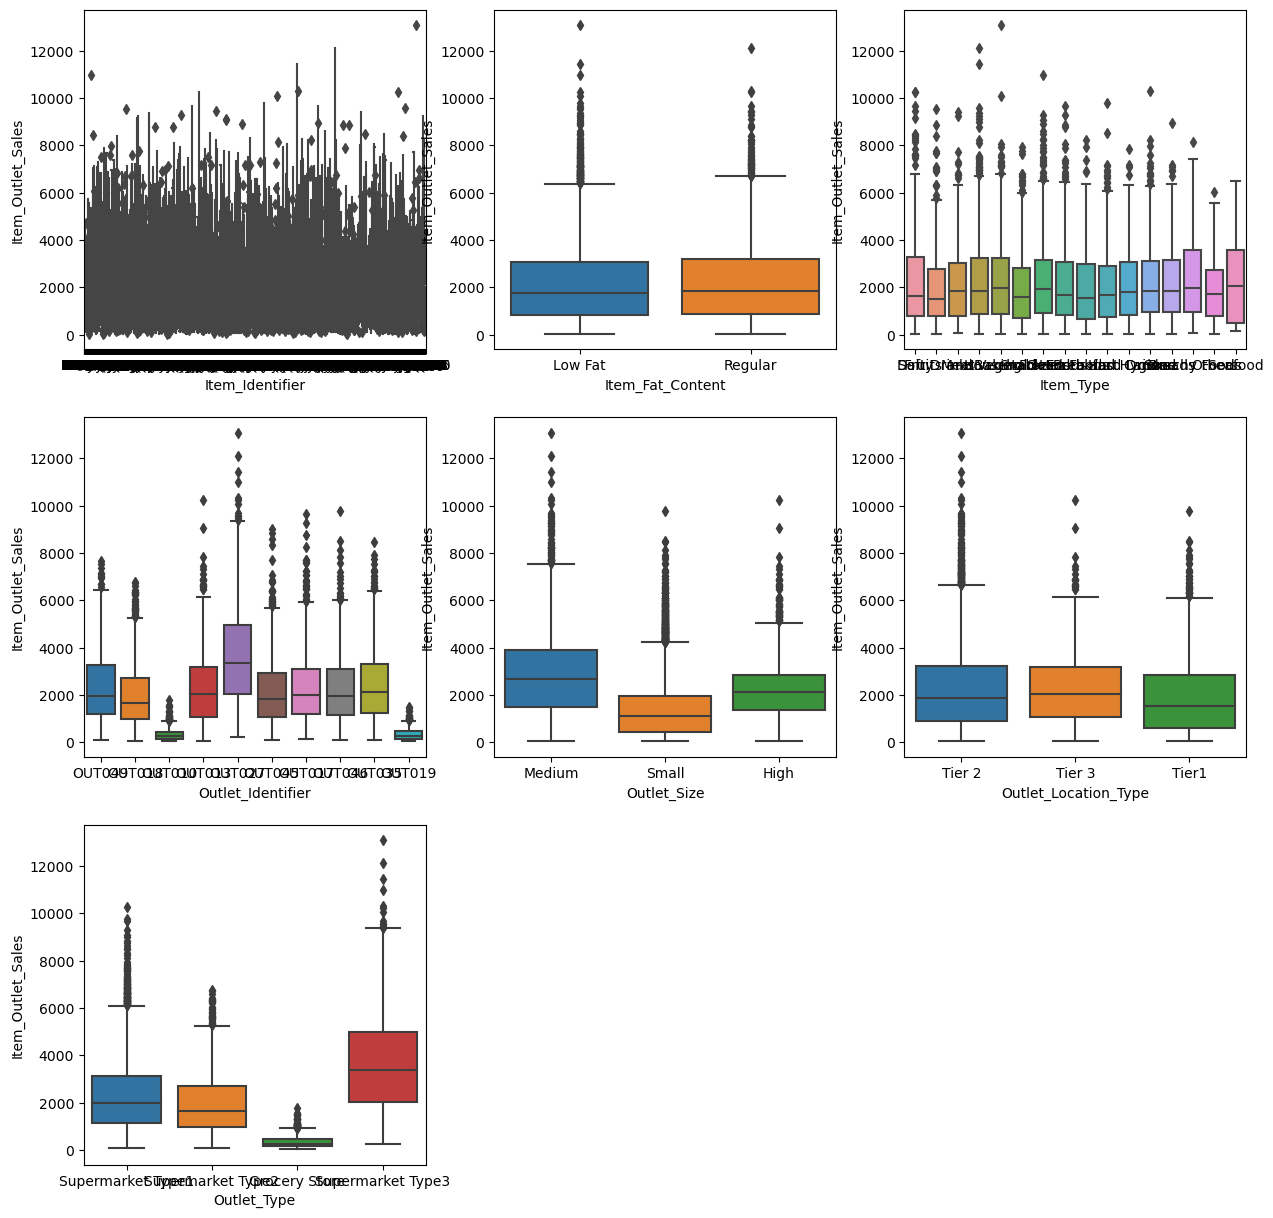

In [52]:
# cat - num
plt.figure(figsize=[15,15])
i = 1
for col in cat:
    ax = plt.subplot(3,3,i)
    sns.boxplot(x=data[col],y=data['Item_Outlet_Sales'])
    i+=1

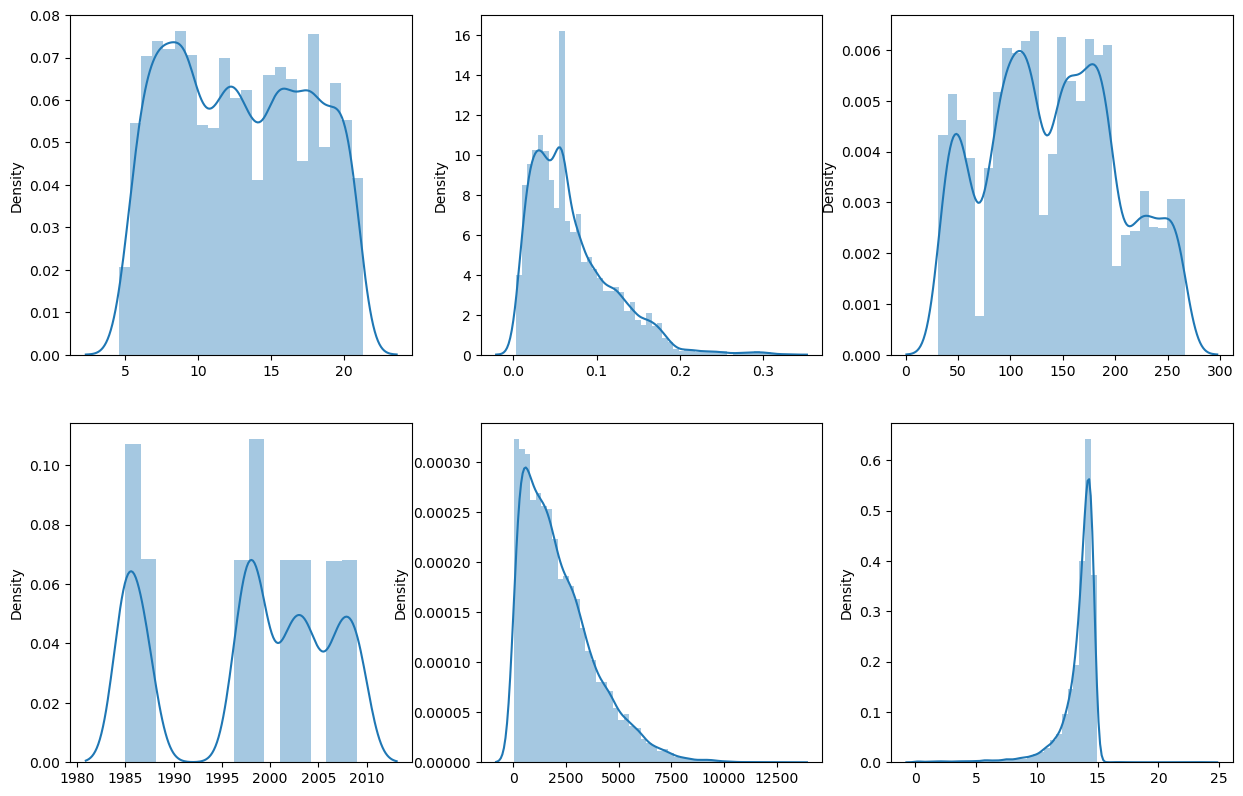

In [53]:
# univariate
plt.figure(figsize=[15,15])
i = 1
for col in num:
    ax = plt.subplot(3,3,i)
    sns.distplot(x=num[col])
    i+=1

In [54]:
num.skew()

Item_Weight                  0.070332
Item_Visibility              1.310871
Item_MRP                     0.127390
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Profit                      -3.379808
dtype: float64

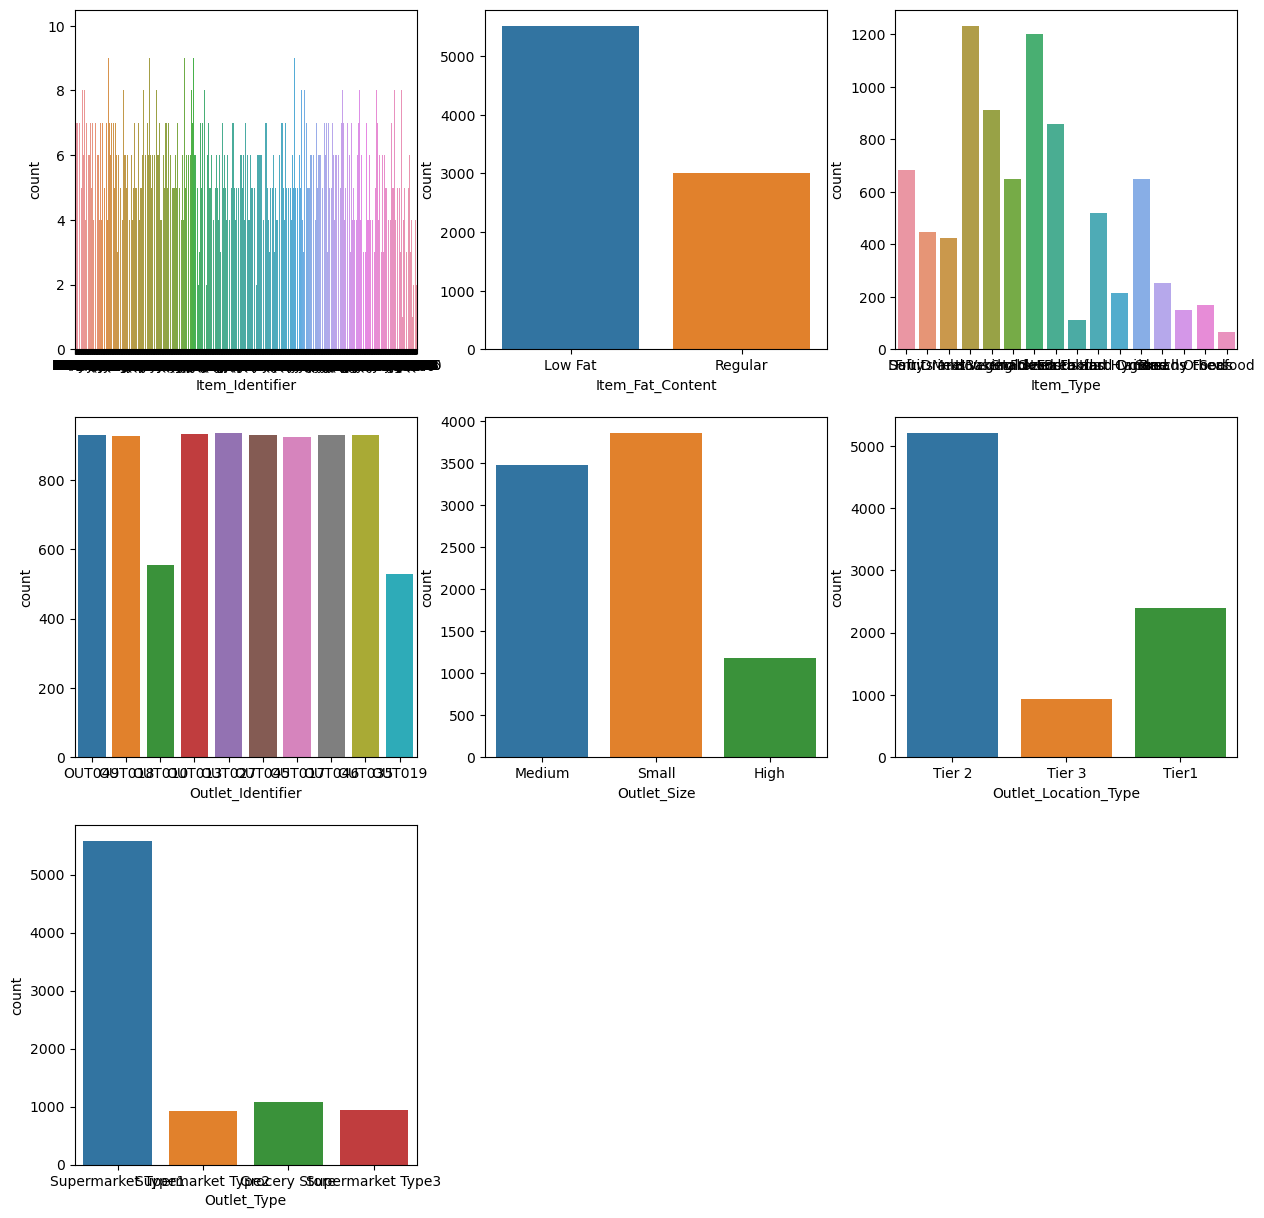

In [55]:
# univariate for categorial data
plt.figure(figsize=[15,15])
i = 1
for col in cat:
    ax = plt.subplot(3,3,i)
    sns.countplot(x=cat[col])
    i+=1

In [56]:
for col in cat:
    print(cat[col].value_counts(normalize=True))

Item_Identifier
FDW13    0.001173
FDG33    0.001173
NCY18    0.001056
FDD38    0.001056
DRE49    0.001056
           ...   
FDY43    0.000117
FDQ60    0.000117
FDO33    0.000117
DRF48    0.000117
FDC23    0.000117
Name: proportion, Length: 1559, dtype: float64
Item_Fat_Content
Low Fat    0.647307
Regular    0.352693
Name: proportion, dtype: float64
Item_Type
Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007509
Name: proportion, dtype: float64
Outlet_Identifier
OUT027    0.109703
OUT013    0.109351
OUT049

In [57]:
# Outlier analysis for numerical variables

# Detect Outliers using IQR, Zscore, plots and .skew() function
# Outlier Treatment :
   # 1. Dropping the outliers
   # 2. Capping the outliers to a specific values (Winsorization)
   # 3. Transformation functions

In [58]:
for i in num.columns:
    Q1 = num[i].quantile(.25)
    Q3 = num[i].quantile(.75)
    IQR = Q3 - Q1
    ub = Q3+1.5*IQR
    lb = Q1-1.5*IQR
    
    lc = num[i].quantile(.05)
    uc = num[i].quantile(.95)
    
    for ind in num[i].index:
        if(num.loc[ind,i]>uc):
            num.loc[ind,i] = uc
        elif num.loc[ind,i] < lc:
            num.loc[ind,i] = lc

In [59]:
num.skew()

Item_Weight                  0.073813
Item_Visibility              0.758205
Item_MRP                     0.105753
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            0.698867
Profit                      -1.409225
dtype: float64

In [60]:
# since, it still conntains skwed data for Item visibility and profit
num['Item_Visibility'] = np.sqrt(num['Item_Visibility'])

In [61]:
num['Item_Outlet_Sales'] = np.sqrt(num['Item_Outlet_Sales'])

In [62]:
import math

In [63]:
np.power(num['Profit'],3).skew()

-1.0956240423422396

In [64]:
num['Profit'] = np.exp(num['Profit'])

In [65]:
num.skew()

Item_Weight                  0.073813
Item_Visibility              0.262912
Item_MRP                     0.105753
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            0.089481
Profit                       0.126767
dtype: float64

In [72]:
# Dropping

Q1 = num[i].quantile(.25)
Q3 = num[i].quantile(.75)

IQR = Q3 - Q1

ub = Q3 + 1.5*IQR
lb = Q1 - 1.5*IQR

num[num[(num['Item_Visibility']<lb)|(num['Item_Visibility']>ub)]].index

RangeIndex(start=0, stop=8523, step=1)

In [67]:
#Scaling or Normalization

In [68]:
# categorical Encoding

In [73]:
cat.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [74]:
cat = cat.drop('Item_Identifier', axis=1)

In [75]:
cat.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [80]:
#get_dummies

dummies = pd.get_dummies(cat[['Item_Fat_Content','Outlet_Type']],dtype='float',drop_first=True)

In [81]:
dummies

,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
8518,0.0,1.0,0.0,0.0
8519,1.0,1.0,0.0,0.0
8520,0.0,1.0,0.0,0.0
8521,1.0,0.0,1.0,0.0


In [82]:
cat = cat.drop(['Item_Fat_Content','Outlet_Type'], axis=1)
cat = pd.concat([cat,dummies],axis=1)

In [83]:
cat.columns

Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Item_Fat_Content_Regular', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [84]:
#ordinal encoder

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

In [88]:
oe = OrdinalEncoder(categories=[['Small','Medium','High']])
oe_data = oe.fit_transform(cat['Outlet_Size'].values.reshape(-1,1))

In [89]:
oe_data

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

In [91]:
cat.head()

,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,Dairy,OUT049,Medium,Tier 2,0.0,1.0,0.0,0.0
1,Soft Drinks,OUT018,Medium,Tier 2,1.0,0.0,1.0,0.0
2,Meat,OUT049,Medium,Tier 2,0.0,1.0,0.0,0.0
3,Fruits and Vegetables,OUT010,Small,Tier 2,1.0,0.0,0.0,0.0
4,Household,OUT013,High,Tier 3,0.0,1.0,0.0,0.0


In [94]:
oe = OrdinalEncoder(categories=[['Tier1','Tier 2','Tier 3']])
cat['Outlet_Location_Type'] = oe.fit_transform(cat['Outlet_Location_Type'].values.reshape(-1,1))
cat.head()

,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,Dairy,OUT049,Medium,1.0,0.0,1.0,0.0,0.0
1,Soft Drinks,OUT018,Medium,1.0,1.0,0.0,1.0,0.0
2,Meat,OUT049,Medium,1.0,0.0,1.0,0.0,0.0
3,Fruits and Vegetables,OUT010,Small,1.0,1.0,0.0,0.0,0.0
4,Household,OUT013,High,2.0,0.0,1.0,0.0,0.0


In [69]:
#Train test split